In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris() 

In [11]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [44]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
dfle=df
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
df = df.drop(["petal length (cm)","petal width (cm)"],axis="columns")

In [67]:
df

,sepal length (cm),sepal width (cm),target
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,0
146,0.555556,0.208333,2
147,0.611111,0.416667,0
148,0.527778,0.583333,0


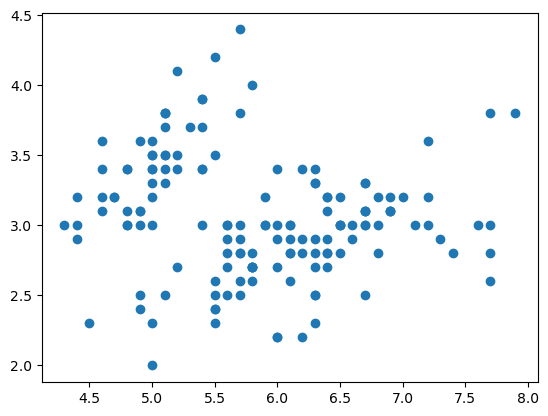

In [50]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])

In [68]:
from sklearn.preprocessing import  MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
scaler.fit(df[["sepal length (cm)"]])

MinMaxScaler()

In [71]:
df["sepal length (cm)"]=scaler.transform(df[["sepal length (cm)"]])


In [72]:
scaler.fit(df[["sepal width (cm)"]])

MinMaxScaler()

In [73]:
df["sepal width (cm)"]=scaler.transform(df[["sepal width (cm)"]])


In [74]:
df

,sepal length (cm),sepal width (cm),target
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,0
146,0.555556,0.208333,2
147,0.611111,0.416667,0
148,0.527778,0.583333,0


In [75]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [76]:
ypred = km.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [77]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [78]:
df["target"] = ypred

In [79]:
df

,sepal length (cm),sepal width (cm),target
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,0
147,0.611111,0.416667,2
148,0.527778,0.583333,2


In [80]:

df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

Text(0, 0.5, 'sepal width')

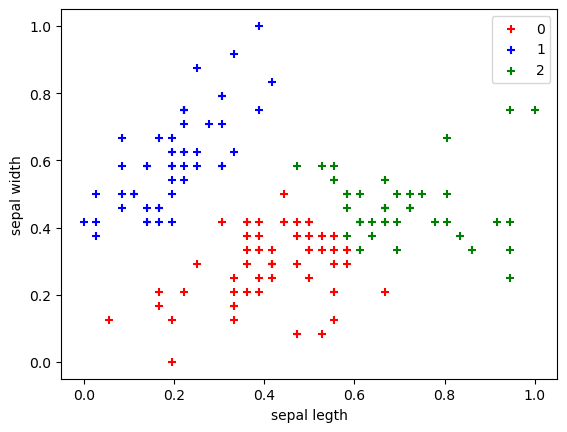

In [81]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],marker="+",color="red"  ,label="0")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],marker="+",color="blue" ,label="1")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],marker="+",color="green",label="2")
plt.legend()
plt.xlabel("sepal legth")
plt.ylabel("sepal width")

In [82]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

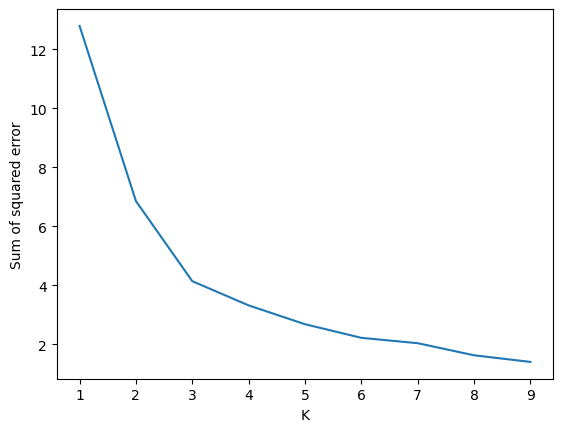

In [83]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)